# Mini Proyecto 2
### Item 1 - (A,B):
  - Trabajar en Jupyter Notebook
  - Importar Librerias


In [3]:
import os, sys
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

### Item 1 - C:
Cargar Base de datos (*ejemplo_data.csv*)


In [4]:
datos_ejemplo = os.path.join("ejemplo_data.csv")
if not os.path.isfile(datos_ejemplo): raise SystemExit("Input File not found")

df = pd.read_csv(datos_ejemplo)
df
    

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,1
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,0
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,1
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,1
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,0
5,651029,San Pablo,"-$15,000.00",$ 12750.00,-15.00%,No,2-15-2014,n


### Item 1 - D
Identificar tipos de variables presentes en la base de datos

In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6 non-null      int64 
 1   Nombre       6 non-null      object
 2   2016         6 non-null      object
 3   2017         6 non-null      object
 4   Crecimiento  6 non-null      object
 5   Unidades     6 non-null      object
 6   fecha        6 non-null      object
 7   Activo       6 non-null      object
dtypes: int64(1), object(7)
memory usage: 512.0+ bytes
None


### Item 1 - E:
- Convertir la columna *ID* a entero (Ya viene como *int64*)
- Convertir la columna *Activo* a binario

In [6]:
bool_map = {'1': True, '0': False, 'n': False}
#for i, val in enumerate(df['Activo']): df['Activo'][i] = bool_map[str(val)]
bool_parse = lambda val: bool_map[str(val)]
df['Activo'] = df['Activo'].apply(bool_parse)
df['Activo'] = df['Activo'].astype('bool')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6 non-null      int64 
 1   Nombre       6 non-null      object
 2   2016         6 non-null      object
 3   2017         6 non-null      object
 4   Crecimiento  6 non-null      object
 5   Unidades     6 non-null      object
 6   fecha        6 non-null      object
 7   Activo       6 non-null      bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 470.0+ bytes


In [7]:
df['Activo']

0     True
1    False
2     True
3     True
4    False
5    False
Name: Activo, dtype: bool

### Item 1 - F:
Convertir columna *Unidades* a `entero` *2016* a `float` 

In [8]:
#NOTE: Unidades Step
#for i, val in enumerate(df['Unidades']): df['Unidades'][i] = 0 if val == 'No' else int(val)
def integer_parse(val):
  try: return int(val)
  except: return 0 #NOTE: was not an vaild str number
df['Unidades'] = df['Unidades'].apply(integer_parse)
df['Unidades'] = df['Unidades'].astype('int')
df.info()

#NOTE: 2016 Step
#for i, val in enumerate(df['2016']): df['2016'][i] = float(re.sub('[\$,]', '', val))
float_parser = lambda val: float(re.sub('[\$,]', '', val))
df['2016'] = df['2016'].apply(float_parser)
df['2016'] = df['2016'].astype('float')
df[['2016', 'Unidades']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6 non-null      int64 
 1   Nombre       6 non-null      object
 2   2016         6 non-null      object
 3   2017         6 non-null      object
 4   Crecimiento  6 non-null      object
 5   Unidades     6 non-null      int64 
 6   fecha        6 non-null      object
 7   Activo       6 non-null      bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 470.0+ bytes


,2016,Unidades
0,125000.0,500
1,920000.0,700
2,50000.0,125
3,350000.0,75
4,15000.0,0
5,-15000.0,0


### Item 2 - A, B:
Crear diccionario con 20 datos que contengan al menos 2 atributos continuos y una variable categórica

1. Se hace un fetch hacia una API que retorna los cartas monstruodel  juego de cartas coleccionables Yu-Gi-Oh, se extraeran los sigientes atributos de cada carta para el ejercicio:

```json
{
  "name": "str", //-> Nombre de la carta
  "race": "str", //-> Tipo de monstruo
  "atk": "int", //-> Ataque del monstruo
  "def": "int" //-> Defensa del monstruo
}
```
2. Se recorta la lista de cartas y se convierte en un DataFrame


In [9]:
import requests

fetch = requests.get('https://db.ygoprodeck.com/api/v7/cardinfo.php?level=4&attribute=water&sort=atk', headers={'Content-Type': 'application/json'})
data = fetch.json().get('data', [])
data = data[0:20]
fields_to_extract = ['name', 'race', 'atk', 'def']
data = [{field:monster[field] for field in fields_to_extract if field in monster.keys()} for monster in data]
monsters_df = pd.DataFrame(data)
monsters_df

,name,race,atk,def
0,Adamancipator Crystal - Dragite,Rock,0,2200
1,Fortune Fairy Swee,Spellcaster,0,0
2,Fortune Lady Water,Spellcaster,0,0
3,"Goldenhair, the Newest Plunder Patroll",Fiend,0,2000
4,Guard Penguin,Winged Beast,0,1200
5,Reptilianne Gardna,Reptile,0,2000
6,Rikka Princess,Plant,0,0
7,Mermail Abyssmander,Fish,100,2000
8,Performapal Stamp Turtle,Aqua,100,1800
9,Jar Turtle,Reptile,200,2100


### Item 2 - B, C:
Obtener estadísticas descriptivas de tendencia central y descriptivas.

In [10]:
#NOTE: Medidas de tendencia central
print(f"El ataque y defensa promedio de los monstruos obtendos es de {monsters_df['atk'].mean()}, {monsters_df['def'].mean()} respectivamente")
print(f"El ataque y defensa que mas se repite de los monstruos obtendos es: \n{monsters_df['atk'].mode()} \n{monsters_df['def'].mode()}")
print(f"El ataque y defensa que se ubican en el centro de la muestra corresponden a {monsters_df['atk'].median()}, {monsters_df['def'].median()} respectivamente")
#NOTE: Medidas de dispersión
print(f"Rango ATK y DEF {np.round(monsters_df['atk'].max()-monsters_df['atk'].min())}, {np.round(monsters_df['def'].max()-monsters_df['def'].min())} respectivamente")
var_atk, var_def = np.round(monsters_df['atk'].var(),2), np.round(monsters_df['def'].var(),2)
print(f"Varianza ATK y DEF {var_atk}, {var_def} respectivamente")
std_atk, std_def = np.round(monsters_df['atk'].std(),2), np.round(monsters_df['def'].std(),2)
print(f"Deviación Estandar ATK y DEF {std_atk}, {std_def} respectivamente")
monsters_df.describe()
monsters_df.groupby('race').get_group('Aqua')


El ataque y defensa promedio de los monstruos obtendos es de 250.0, 1110.0 respectivamente
El ataque y defensa que mas se repite de los monstruos obtendos es: 
0      0
1    500
Name: atk, dtype: int64 
0       0
1    2000
Name: def, dtype: int64
El ataque y defensa que se ubican en el centro de la muestra corresponden a 250.0, 1100.0 respectivamente
Rango ATK y DEF 500, 2200 respectivamente
Varianza ATK y DEF 51052.63, 703052.63 respectivamente
Deviación Estandar ATK y DEF 225.95, 838.48 respectivamente


,name,race,atk,def
8,Performapal Stamp Turtle,Aqua,100,1800
19,Reactor Slime,Aqua,500,500


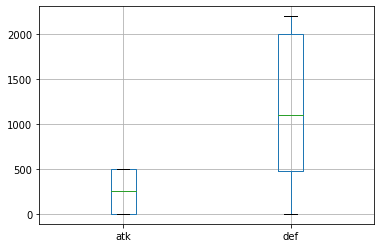

In [11]:
import matplotlib.pyplot as plt
plot = monsters_df[['atk', 'def']]
plot.boxplot()
plt.show()

In [12]:
print(f"Covarianza")
monsters_df.cov()

Covarianza


,atk,def
atk,51052.631579,-47368.421053
def,-47368.421053,703052.631579


### Item 3 - A, B
Importar la base de tados `ejemplo_data2.csv` 

In [13]:
datos_ejemplo2 = os.path.join("ejemplo_data2.csv")
if not os.path.isfile(datos_ejemplo): raise SystemExit("Input File not found")

df2 = pd.read_csv(datos_ejemplo2)
df2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


### Item 3 - B
- Analisis de números perdidos
- Imputacion de valores segun media
- Imputacion de valores segun criterio a elección

In [14]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Dado que, las columnas de tipo *numerico* que poseen datos `NaN` son las siguientes
```python
[('Car', 62), ('BuildingArea', 6450), ('YearBuilt', 5375)]
```
Se hace una inserción de datos usando la media de la columna correspondiente


In [15]:
#for col in df2.columns: print(f"{col} { df2[col].isnull().sum()}")
null_int_columns = [(col, df2[col].isnull().sum()) for col in df2.columns if df2[col].dtype in ['float64', 'int64'] and df2[col].isnull().sum()]
print(null_int_columns)
for col in null_int_columns:
  print(df2[col[0]].fillna(value=df2[col[0]].mean(), inplace=True))
#for col in df2.columns: print(f"{col} { df2[col].isnull().sum()}")



[('Car', 62), ('BuildingArea', 6450), ('YearBuilt', 5375)]
None
None
None


Se han insertado valores en las columnas en donde existian valores NaN

In [16]:
df2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1964.684217,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1964.684217,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.000000,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,151.96765,1981.000000,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.00000,1995.000000,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,151.96765,1997.000000,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.00000,1920.000000,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


Finalmente se general generan las variables numericas a partir de las categoricas

In [17]:
pd.get_dummies(df2)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,...,1,0,0,0,1,0,0,0,0,0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,...,1,0,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,...,1,0,0,0,1,0,0,0,0,0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,...,1,0,0,0,1,0,0,0,0,0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.000000,...,0,0,0,0,0,0,1,0,0,0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.000000,...,0,0,0,0,0,0,0,0,1,0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.000000,...,0,0,0,0,0,0,0,0,1,0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.00000,1920.000000,...,0,0,0,0,0,0,0,0,1,0


### Item 4 - A, B, C, D:
Importado de librerias y creacion de los datos

In [18]:
import seaborn as sns, matplotlib, numpy as np

dummie_data = np.random.multivariate_normal((0,0), [[1,0], [0,1]], 100)
dummie_data = np.hstack([dummie_data, np.zeros((dummie_data.shape[0], 1))])

dummie_data2 = np.random.multivariate_normal((3,3), [[1,0], [0,1]], 100)
dummie_data2 = np.hstack([dummie_data2, np.ones((dummie_data2.shape[0], 1))])

final_data = np.concatenate([dummie_data, dummie_data2])

data_df = pd.DataFrame(final_data, columns=['A', 'B', 'bool'])
data_df

,A,B,bool
0,0.096520,-0.123814,0.0
1,-0.025196,-0.800132,0.0
2,-1.394522,0.559790,0.0
3,-0.428364,0.156752,0.0
4,-1.711457,1.348907,0.0
...,...,...,...
195,3.230308,2.608242,1.0
196,2.556460,3.341844,1.0
197,3.742274,1.974431,1.0
198,2.299239,2.954652,1.0


### Item 4 - E:
Gráfico de dispersion

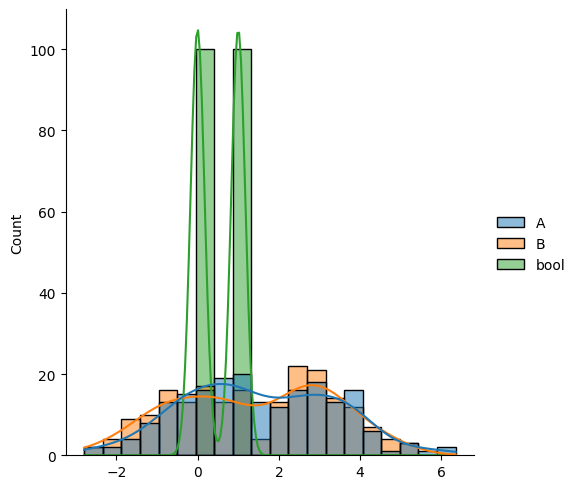

In [19]:
sns.displot(data_df, bins=20, kde=True, rug=False)

### Item 4 - F:
BoxPlot para las dimensiones de los datos

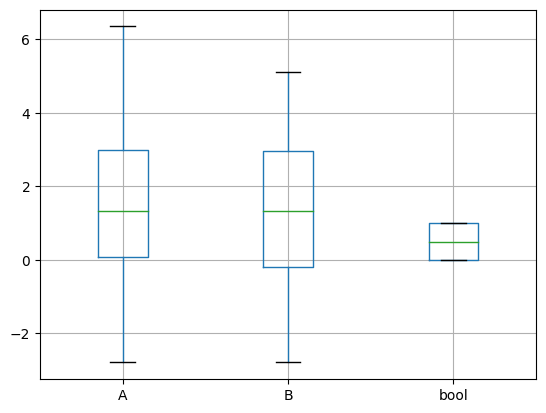

In [20]:
plot2 = data_df[['A', 'B', 'bool']]
plot2.boxplot()
plt.show()